### Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

### Read CSV

In [13]:
# Step 1: Load the data
file = 'data.csv'
data = pd.read_csv(file)

# Step 2: Display the first few rows of the dataset
#print("Original Data:")
#print(data.head())

# Step 3: Check for missing values
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum().sum())


Missing Values Before Cleaning:
0


### Categories


In [14]:
# Step 2: Check if all columns are numerical
if all(data.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
    print("\nAll columns are numerical.")
else:
    print("\nNot all columns are numerical. Here's the breakdown:")
    print(data.dtypes)


All columns are numerical.


In [15]:
# Define y as the first column
y = data.iloc[:, 0]

# Check the balance of the binary target column
print("Class distribution in the target column:")
print(y.value_counts())

Class distribution in the target column:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64


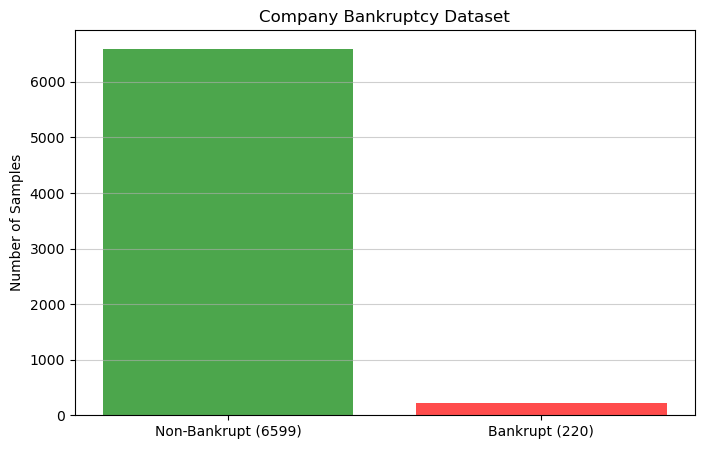

In [16]:
import matplotlib.pyplot as plt

# Data from class distribution
labels = ["Non-Bankrupt (6599)", "Bankrupt (220)"]
counts = [6599, 220]

# Create histogram
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['green', 'red'], alpha=0.7)
plt.ylabel("Number of Samples")
plt.title("Company Bankruptcy Dataset")
plt.grid(axis='y', alpha=0.6)

# Show plot
plt.show()


In [17]:
# Define y as the first column and x as the rest
y = data.iloc[:, 0]
x = data.iloc[:, 1:]

In [18]:
from imblearn.over_sampling import SMOTE
import os

# Set the number of cores explicitly to avoid loky warnings
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Adjust the value to match your physical cores

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
x_balanced, y_balanced = smote.fit_resample(x, y)

# Output class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

Class distribution after SMOTE:
Bankrupt?
1    6599
0    6599
Name: count, dtype: int64


In [19]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Assuming x_balanced and y_balanced are your datasets
# Convert to NumPy arrays for efficiency
x_balanced_np = x_balanced.values if isinstance(x_balanced, pd.DataFrame) else x_balanced
y_balanced_np = y_balanced.values if isinstance(y_balanced, pd.Series) else y_balanced

# Step 1: Scale features for optimization and numerical stability
scaler = StandardScaler()
x_balanced_scaled = scaler.fit_transform(x_balanced_np)

# Step 2: Initialize the Logistic Regression model
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, random_state=42, n_jobs=-1)

# Step 3: Perform Recursive Feature Elimination with Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
rfecv.fit(x_balanced_scaled, y_balanced_np)

# Step 4: Extract and display the optimal number of features
optimal_features = rfecv.n_features_
selected_features = np.array(x_balanced.columns)[rfecv.support_]

print("Optimal Number of Features:", optimal_features)
print("Selected Features (Boolean Mask):", rfecv.support_)
print("Feature Ranking:", rfecv.ranking_)
print("Selected Feature Names:", selected_features.tolist())


Optimal Number of Features: 88
Selected Features (Boolean Mask): [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True False False  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 3 8 1]
Selected Feature Names: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before i

In [20]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming x_balanced_scaled and y_balanced are prepared
# Combine x and y into a single DataFrame for saving
balanced_data = pd.DataFrame(x_balanced, columns=x.columns)
balanced_data['target'] = y_balanced

# Split into train (80%) and test (20%)
train_data, test_data = train_test_split(balanced_data, test_size=0.2, random_state=42, stratify=balanced_data['target'])

# Save to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Data successfully split and saved as train_data.csv and test_data.csv.")


Data successfully split and saved as train_data.csv and test_data.csv.
